<h1 style="color:green; margin-bottom:15px;font-size:30px">Telecom Company Data Plans Evaluation</h1>

# The Goal of the Project

The dataset has the data of 500 customers of a imaginary Telecom company called Megaline (who they are, where they come from, which data plan they have use, how many calls and messages they've sent in 2018). 

The goal of this project is to analyze the behavior of customers and choose the data plan to promote in ads.

# Data Plans Descriptions

**Ultra Plan**

<ul>
<li>Monthly fee: 1950 rubles</li>
<li>3000 minutes of calls, 1000 messages and 30 GB of data included</li>
<li>The cost of services beyond the package:<br>
     1 minute of conversation: 1 ruble; <br>
     1 message: 1 ruble; <br>
     1 GB of Internet traffic: 150 rubles.
</li>
</ul>

**Smart Plan**

<ul>
<li>Monthly fee: 550 rubles</li>
<li>500 minutes of calls, 50 messages and 15 GB of data included</li>
<li>The cost of services beyond the package: <br>
     1 minute of conversation: 3 rubles; <br>
     1 message: 3 rubles; <br>
     1 GB of Internet traffic: 200 rubles.<br>
</li>
</ul>

# Note:

Megaline always rounds up minutes and megabytes. For web traffic, individual sessions are not counted. Instead, the monthly total is rounded up. If a subscriber used 1025 megabytes this month, they will be charged for 2 gigabytes.

<h1>Contents<span class="tocSkip"></span></h1>
<ol>
<li>Libraries Import</li>
<li>Data Import</li>
<li>Data Description </li>
<li>Data Preparation</li>
<li>Data Analysis</li>
<li>Hypotheses Testing</li>
<li>Conclusion and Recommendations</li>
</ol>

# 1. Libraries Import

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

# 2. Data Import

In [2]:
calls=pd.read_csv('calls.csv', sep='\,', parse_dates=['call_date'])
internet=pd.read_csv('internet.csv', sep='\,', index_col=0, parse_dates=['session_date'])
messages=pd.read_csv('messages.csv', sep='\,', parse_dates=['message_date'])
tariffs=pd.read_csv('tariffs.csv', sep='\,')
users=pd.read_csv('users.csv', sep='\,')

display(users.head(5))
display(users.info())
users.describe().T

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [3]:
display(calls.head(5))
display(calls.info())
calls.describe().T

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


None

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [4]:
display(messages.head(5))
display(messages.info())
messages.describe().T

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


In [5]:
display(internet.head(5))
display(internet.info())
internet.describe().T

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


None

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [6]:
display(tariffs.head(5))
display(tariffs.info())
tariffs.describe().T

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


# 3. Data Description

**The dataset contains 5 tables**

**users table** has 500 users and 8 variables
<ol>
<li>user_id</li>
<li>first_name</li>
<li>last_name</li>
<li>age &mdash; in years</li>
<li>reg_date &mdash; data plan starting date for this user (day, month, year)</li>
<li>churn_date &mdash; the date when the user switched data plan or left the company (if the value is omitted, then the plan was still valid at the time of data export)</li>
<li>city</li>
<li>tarif - data plan</li>
</ol>

**calls table** has 202607 calls and 4 variables
<ol>
<li>id &mdash; call id</li>
<li>call_date</li>
<li>duration &mdash; in minutes</li>
<li>user_id &mdash; id of the user that made a call</li>
</ol>

**messages table** has 123036 messages и 3 variables
<ol>
<li>id &mdash; message id</li>
<li>message_date</li>
<li>user_id &mdash; id of the user that sent the message</li>
</ol>

**internet sessions table** has 149396 internet sessions and 4 variables
<ol>
<li>id &mdash; session id</li>
<li>mb_used</li>
<li>session_date</li>
<li>user_id &mdash; id of the user that had a session</li>
</ol>

**tariffs (data plans) table** содержит 2 тарифа и 8 переменных
<ol>
<li>tariff_name &mdash; - data plan name</li>
<li>rub_monthly_fee &mdash; monthly fee in rubles</li>
<li>minutes_included &mdash; minutes included</li>
<li>messages_included &mdash; messages included</li>
<li>mb_per_month_included &mdash; MB of internet traffic included</li>
<li>rub_per_minute &mdash; fee for 1 minute beyond the package, in rubles</li>
<li>rub_per_message &mdash; fee for 1 message beyond the package, in rubles</li>
<li>rub_per_gb &mdash; fee for 1 GB beyond the package, in rubles</li>
</ol>

**The first 4 tables (users, internet sessions, calls and messages) are linked by the key user_id.<br>
The users and tariffs are linked by tariff_name - data plan.**

# 4. Data Preparation
<ol>
<li>Convert types where necessary</li>
<li>Find and correct data errors</li>
<li>Count for each user:</li>
- the number of calls made and spent minutes of conversation by month;<br>
- number of sent messages by month;<br>
- the amount of Internet traffic per month;<br>
- monthly revenue per user.

# 4.1. Preprocessing the table with users
<ol>
<li>Let's remove the columns *age*, *first_name*, *last_name*, *reg_date* as we won't need them further</li>
<li>Let's convert the *city* variable into boolean categorical variable with 2 values '1 - Moscow' and '0 - not Moscow' for memory optimization</li>
<li>Let's onvert the *tariff* (data plan) into boolean categorical variable with 2 values '1 - ultra' and '0 - smart'for memory optimization</li>

In [7]:
display('users:')
display(users.info())

del users['age']
del users['first_name']
del users['last_name']
del users['reg_date']

users.loc[users['city'] != 'Москва', 'city'] = 0 #not Moscow
users.loc[users['city'] == 'Москва', 'city'] = 1 #Moscow
users['city'] = users['city'].astype('bool')

users.loc[users['tariff'] == 'ultra', 'tariff'] = 0 #ultra
users.loc[users['tariff'] == 'smart', 'tariff'] = 1 #smart
users['tariff'] = users['tariff'].astype('bool')

display(users.info())

'users:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   churn_date  38 non-null     object
 2   city        500 non-null    bool  
 3   tariff      500 non-null    bool  
dtypes: bool(2), int64(1), object(1)
memory usage: 8.9+ KB


None

# 4.2. Preprocessing the table with calls
<ol>
<li>Calls with zero duration are missed calls, they should not be deleted</li>
<li>Let's remove call id variable, we won't need it for analysis</li>
<li>Since all calls were made in 2018, and we only need a month for further analysis, we'll convert the date of the call to the month of the call and the variable type to int</li>
<li>Let's convert the duration to an integer type, rounding it up according to the Megaline rules</li>

In [8]:
display('calls table:')
display(calls.info())

del calls['id']

calls['month'] = calls['call_date'].dt.month
del calls['call_date']

calls['duration'] = calls['duration'].apply(math.ceil)
calls['duration'] = calls['duration'].astype(int)

display(calls.info())

'calls table:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   duration  202607 non-null  int32
 1   user_id   202607 non-null  int64
 2   month     202607 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 3.9 MB


None

# 4.3. Preprocessing the table with messages
<ol>
<li>Let's remove the message id variable, we won't need it further</li>
<li>Let's convert date to month and variable type to int</li>

In [9]:
display('messages table:')
display(messages.info())

del messages['id']

messages['month'] = messages['message_date'].dt.month
del messages['message_date']

display(messages.info())

'messages table:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  123036 non-null  int64
 1   month    123036 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


None

# 4.4. Preprocessing the table with internet sessions
<ol>
<li>Let's remove the id variable, we won't need it further</li>
<li>Let's convert date to month and variable type to int</li>
<li>Let's remove the lines with zero internet sessions (19598 lines), since they will not affect the total cost (apparently these are some kind of network failures)</li>

In [10]:
display('internet sessions table:')
display(internet.head(5))
display(internet.info())

del internet['id']

internet['month'] = internet['session_date'].dt.month
del internet['session_date']

display(internet.info())
display(internet.head(5))

'internet sessions table:'

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   mb_used  149396 non-null  float64
 1   user_id  149396 non-null  int64  
 2   month    149396 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


None

,mb_used,user_id,month
0,112.95,1000,11
1,1052.81,1000,9
2,1197.26,1000,6
3,550.27,1000,8
4,302.56,1000,9


In [11]:
internet['mb_used'].value_counts().sort_values()
internet.drop(internet[internet['mb_used'] == 0].index, inplace=True)
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   mb_used  129798 non-null  float64
 1   user_id  129798 non-null  int64  
 2   month    129798 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 4.0 MB


None

# 4.5. Preprocessing the table with tariffs (data plans)
<ol>
<li>Let's rename 'tariff_name' into 'tariff' to match the users table</li>
<li>Let's convert MB into GB</li>
</ol>


In [12]:
display('tariffs table:')
display(tariffs.info())

tariffs.loc[tariffs['tariff_name'] == 'ultra', 'tariff_name'] = 0 #ultra
tariffs.loc[tariffs['tariff_name'] == 'smart', 'tariff_name'] = 1 #smart
tariffs['tariff'] = tariffs['tariff_name'].astype('bool')
del tariffs['tariff_name']

tariffs['gb_included'] = tariffs['mb_per_month_included'] / 1024
tariffs['gb_included'] = tariffs['gb_included'].astype('int')
del tariffs['mb_per_month_included']

display(tariffs.info())

'tariffs table:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   messages_included  2 non-null      int64
 1   minutes_included   2 non-null      int64
 2   rub_monthly_fee    2 non-null      int64
 3   rub_per_gb         2 non-null      int64
 4   rub_per_message    2 non-null      int64
 5   rub_per_minute     2 non-null      int64
 6   tariff             2 non-null      bool 
 7   gb_included        2 non-null      int32
dtypes: bool(1), int32(1), int64(6)
memory usage: 234.0 bytes


None

In [13]:
tariffs

,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_included
0,50,500,550,200,3,3,True,15
1,1000,3000,1950,150,1,1,False,30


In [14]:
print('Memory in MB used before data preprosessing')
a = round(6.2 + 2.8 + 5.7,2)
print(a)

Memory in MB used before data preprosessing
14.7


In [15]:
print('Memory in MB used after data preprosessing')
b = round(4 + 1.9 + 3.4,2)
print(b)

Memory in MB used after data preprosessing
9.3


In [16]:
print('Memory saved: {:.2%}'.format(round(1-b/a,2)))

Memory saved: 37.00%


Tables preprocessed, 37% of memory saved.

# 4.6. Preparing joined table for analysis

**1. Let's calculate for each user:**<br>
- the number of calls made, minutes spent, messages sent and GB used (rounded according to the company's rules) per month;
- monthly revenue from each user in accordance to the tariff plan by subtracting free minutes, MB and messages from the total number of minutes, GB and messages and multiplying the remainder by the tariff plan prices and adding the monthly fee.

**2. Let's delete the users who changed the tariff plan and the column with the date of the tariff change, since we will no longer need it**<br>

**3. Negative values in the number of calls, messages and Internet traffic mean that the user has used less minutes, messages or Internet traffic. We will replace all negative values in the number of calls, messages and Internet traffic with 0 so that they won't affect the total cost of services**<br>

**4. Let's delete the columns with tariff characteristics, we won't need them anymore**<br>

In [17]:
calls_agg = calls.groupby(['user_id', 'month']).agg({'duration' : 'sum'})
calls_agg_2 = calls.groupby(['user_id', 'month']).agg({'duration' : 'count'})
calls_agg = calls_agg.merge(calls_agg_2, on=['user_id', 'month'], how='right')
calls_agg.columns = ['calls_sum_min', 'calls_count']

messages_agg = messages.groupby(['user_id', 'month']).agg({'month' : 'count'})
messages_agg.columns = ['message_count']

internet_agg = internet.groupby(['user_id', 'month']).agg({'mb_used' : 'sum'})
internet_agg.columns = ['mb_sum']
internet_agg['mb_sum'] = internet_agg['mb_sum'] / 1024
internet_agg['mb_sum'] = internet_agg['mb_sum'].apply(math.ceil)
internet_agg['mb_sum'] = internet_agg['mb_sum'].astype(int)
internet_agg.columns = ['gb_sum']

data = calls_agg.merge(messages_agg, on=['user_id', 'month'], how='outer')
data = data.merge(internet_agg, on=['user_id', 'month'], how='outer')
data = data.merge(users, on=['user_id'], how='outer')
data = data.merge(tariffs, on=['tariff'], how='outer')
data.fillna(0, inplace=True)

data['churn_date'].fillna(0, inplace=True)
data.drop(data[data['churn_date'] != 0].index, inplace=True)
data = data.reset_index(drop=True) 
del data['churn_date']

data['gb_sum_for_calculation'] = data['gb_sum'] - data['gb_included']
data.loc[data['gb_sum_for_calculation'] < 0, 'gb_sum_for_calculation'] = 0

data['calls_min_for_calculation'] = data['calls_sum_min'] - data['minutes_included']
data.loc[data['calls_min_for_calculation'] < 0, 'calls_min_for_calculation'] = 0

data['message_count_for_calculation'] = data['message_count'] - data['messages_included']
data.loc[data['message_count_for_calculation'] < 0, 'message_count_for_calculation'] = 0

data['monthly_revenue'] = data['rub_monthly_fee']+data['rub_per_gb']*data['gb_sum_for_calculation']+data['calls_min_for_calculation']*data['rub_per_minute']+data['message_count_for_calculation']*data['rub_per_message']

del data['gb_included']
del data['minutes_included']
del data['messages_included']

del data['rub_monthly_fee']
del data['rub_per_gb']
del data['rub_per_message']
del data['rub_per_minute']
del data['user_id']

del data['gb_sum_for_calculation']
del data['message_count_for_calculation']
del data['calls_min_for_calculation']

display(data)

,calls_sum_min,calls_count,message_count,gb_sum,city,tariff,monthly_revenue
0,159.0,22.0,22.0,3.0,False,False,1950.0
1,172.0,43.0,60.0,23.0,False,False,1950.0
2,340.0,47.0,75.0,14.0,False,False,1950.0
3,408.0,52.0,81.0,14.0,False,False,1950.0
4,466.0,58.0,57.0,15.0,False,False,1950.0
...,...,...,...,...,...,...,...
3022,0.0,0.0,17.0,11.0,False,True,550.0
3023,0.0,0.0,32.0,17.0,False,True,950.0
3024,0.0,0.0,21.0,20.0,False,True,1550.0
3025,0.0,0.0,20.0,18.0,False,True,1150.0


# 5. Data Analysis

How many minutes, messages and GB do users of each tariff need per month? Let's plot histograms and describe distributions.

# 5.1. Ultra Data Plan

<ul>
<li>Monthly fee: 1950 rubles</li>
<li>3000 minutes of calls, 1000 messages and 30 GB of data included</li>
<li>The cost of services beyond the package:<br>
     1 minute of conversation: 1 ruble; <br>
     1 message: 1 ruble; <br>
     1 GB of Internet traffic: 150 rubles.
</li>
</ul>

In [18]:
ultra = data[data['tariff']==0]
ultra.describe()

,calls_sum_min,calls_count,message_count,gb_sum,monthly_revenue
count,909.000000,909.000000,909.000000,909.000000,909.000000
mean,531.930693,74.224422,51.218922,19.610561,2066.996700
std,320.472257,44.345016,48.344162,9.748723,368.904052
min,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,286.000000,41.000000,9.000000,12.000000,1950.000000
50%,523.000000,75.000000,40.000000,19.000000,1950.000000
75%,753.000000,104.000000,80.000000,27.000000,1950.000000
max,1673.000000,244.000000,224.000000,49.000000,4800.000000


In [19]:
print("Users that exceded the number of included minutes, GB and messages: ")
ultra[ultra['monthly_revenue']>1950].count()

Users that exceded the number of included minutes, GB and messages: 


calls_sum_min      124
calls_count        124
message_count      124
gb_sum             124
city               124
tariff             124
monthly_revenue    124
dtype: int64

In [20]:
mean = ultra['monthly_revenue'].mean()
print('monthly_revenue - mean: {:.2f}'.format(mean))
variance_estimate =  np.var(ultra['monthly_revenue'], ddof=1)
print('monthly_revenue - variance: {:.2f}'.format(variance_estimate))
standard_dev = np.std(ultra['monthly_revenue'], ddof=1)
print('monthly_revenue - standard deviation: {:.2f}'.format(standard_dev))
max = ultra['monthly_revenue'].max()
print('monthly_revenue - max: {:.2f}'.format(max))
print()

mean = ultra['calls_sum_min'].mean()
print('calls_sum_minutes - mean: {:.2f}'.format(mean))
variance_estimate =  np.var(ultra['calls_sum_min'], ddof=1)
print('calls_sum_minutes - variance: {:.2f}'.format(variance_estimate))
standard_dev = np.std(ultra['calls_sum_min'], ddof=1)
print('calls_sum_minutes - standard deviation: {:.2f}'.format(standard_dev))
max = ultra['calls_sum_min'].max()
print('calls_sum_minutes - max: {:.2f}'.format(max))
print()

mean = ultra['message_count'].mean()
print('message_count - mean: {:.2f}'.format(mean))
variance_estimate =  np.var(ultra['message_count'], ddof=1)
print('message_count - variance: {:.2f}'.format(variance_estimate))
standard_dev = np.std(ultra['message_count'], ddof=1)
print('message_count - standard deviation: {:.2f}'.format(standard_dev))
max = ultra['message_count'].max()
print('message_count - max: {:.2f}'.format(max))
print()

mean = ultra['gb_sum'].mean()
print('gb_sum - mean: {:.2f}'.format(mean))
variance_estimate =  np.var(ultra['gb_sum'], ddof=1)
print('gb_sum - variance: {:.2f}'.format(variance_estimate))
standard_dev = np.std(ultra['gb_sum'], ddof=1)
print('gb_sum - standard deviation: {:.2f}'.format(standard_dev))
max = ultra['gb_sum'].max()
print('gb_sum - max: {:.2f}'.format(max))

monthly_revenue - mean: 2067.00
monthly_revenue - variance: 136090.20
monthly_revenue - standard deviation: 368.90
monthly_revenue - max: 4800.00

calls_sum_minutes - mean: 531.93
calls_sum_minutes - variance: 102702.47
calls_sum_minutes - standard deviation: 320.47
calls_sum_minutes - max: 1673.00

message_count - mean: 51.22
message_count - variance: 2337.16
message_count - standard deviation: 48.34
message_count - max: 224.00

gb_sum - mean: 19.61
gb_sum - variance: 95.04
gb_sum - standard deviation: 9.75
gb_sum - max: 49.00


array([[<AxesSubplot:title={'center':'monthly_revenue'}>]], dtype=object)

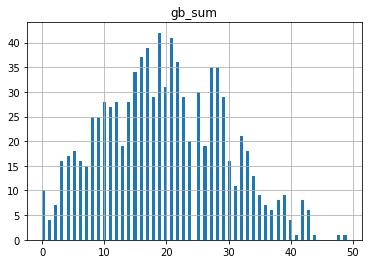

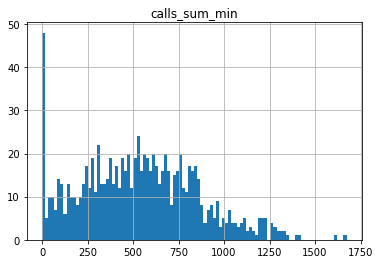

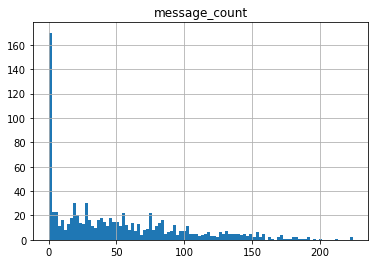

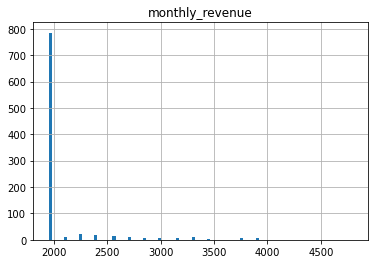

In [21]:
ultra.hist('gb_sum', bins=100, range=(0, 49))
ultra.hist('calls_sum_min', bins=100, range=(0, 1673))
ultra.hist('message_count', bins=100, range=(0, 224))
ultra.hist('monthly_revenue', bins=100, range=(1950, 4800))

*Ultra Data Plan Summary:*
<ol>
<li>In 86% of cases (785 out of 909) users do not go beyond the Ultra package, bringing Megaline 1950 rubles per month.</li>
<li>During the entire observation period, none of the clients of this tariff went beyond 224 messages and/or 1673 call minutes.</li>
<li>In about 170 cases Ultra tariff users did not send a single message for a whole month, in 10 cases they did not use the Internet, and in about 48 cases they did not spend call minutes at all. Megaline can consider introducing additional data plans for these types of users.</li>
<li>In average Ultra users spend 532 minutes with a variance of 320 minutes, send 51 messages with a variance of 48 messages, spend 20 GB of Internet with a variance of 10 GB and spend 2067 rubles with a variance of 369 rubles per month.</li>
<li>The distribution by number of minutes and the distribution by total cost of services are similar to normal distribution.</li>
</ol>

# 5.2. Smart Data Plan
<ul>
<li>Monthly fee: 550 rubles</li>
<li>500 minutes of calls, 50 messages and 15 GB of data included</li>
<li>The cost of services beyond the package: <br>
     1 minute of conversation: 3 rubles; <br>
     1 message: 3 rubles; <br>
     1 GB of Internet traffic: 200 rubles.<br>
</li>
</ul>


In [22]:
data.describe()

,calls_sum_min,calls_count,message_count,gb_sum,monthly_revenue
count,3027.000000,3027.000000,3027.000000,3027.00000,3027.000000
mean,455.553353,63.656426,38.882392,17.35745,1529.969937
std,242.690614,33.357894,36.503511,7.31713,798.322912
min,0.000000,0.000000,0.000000,0.00000,550.000000
25%,287.000000,41.000000,10.000000,13.00000,750.000000
50%,449.000000,63.000000,30.000000,17.00000,1631.000000
75%,597.000000,83.000000,58.000000,21.00000,1950.000000
max,1673.000000,244.000000,224.000000,49.00000,6770.000000


In [23]:
smart = data[data['tariff']==1]
smart.describe()

,calls_sum_min,calls_count,message_count,gb_sum,monthly_revenue
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000
mean,422.773843,59.120869,33.587819,16.390463,1299.489613
std,191.203948,26.049307,28.440087,5.714185,821.963102
min,0.000000,0.000000,0.000000,0.000000,550.000000
25%,287.250000,40.000000,10.000000,13.000000,568.000000
50%,430.000000,61.000000,28.000000,17.000000,1046.500000
75%,550.000000,77.000000,51.000000,20.000000,1750.000000
max,1435.000000,198.000000,143.000000,38.000000,6770.000000


In [24]:
print("Users that exceded the number of included minutes, GB and messages: ")
smart[smart['monthly_revenue']>550].count()

Users that exceded the number of included minutes, GB and messages: 


calls_sum_min      1604
calls_count        1604
message_count      1604
gb_sum             1604
city               1604
tariff             1604
monthly_revenue    1604
dtype: int64

In [25]:
mean = smart['monthly_revenue'].mean()
print('monthly_revenue - mean: {:.2f}'.format(mean))
variance_estimate =  np.var(smart['monthly_revenue'], ddof=1)
print('monthly_revenue - variance: {:.2f}'.format(variance_estimate))
standard_dev = np.std(smart['monthly_revenue'], ddof=1)
print('monthly_revenue - standard deviation: {:.2f}'.format(standard_dev))
max = smart['monthly_revenue'].max()
print('monthly_revenue - max: {:.2f}'.format(max))
print()

mean = smart['calls_sum_min'].mean()
print('calls_sum_minutes - mean: {:.2f}'.format(mean))
variance_estimate =  np.var(smart['calls_sum_min'], ddof=1)
print('calls_sum_minutes - variance: {:.2f}'.format(variance_estimate))
standard_dev = np.std(smart['calls_sum_min'], ddof=1)
print('calls_sum_minutes - standard deviation: {:.2f}'.format(standard_dev))
max = smart['calls_sum_min'].max()
print('calls_sum_minutes - max: {:.2f}'.format(max))
print()

mean = smart['message_count'].mean()
print('message_count - mean: {:.2f}'.format(mean))
variance_estimate =  np.var(smart['message_count'], ddof=1)
print('message_count - variance: {:.2f}'.format(variance_estimate))
standard_dev = np.std(smart['message_count'], ddof=1)
print('message_count - standard deviation: {:.2f}'.format(standard_dev))
max = smart['message_count'].max()
print('message_count - max: {:.2f}'.format(max))
print()

mean = smart['gb_sum'].mean()
print('gb_sum - mean: {:.2f}'.format(mean))
variance_estimate =  np.var(smart['gb_sum'], ddof=1)
print('gb_sum - variance: {:.2f}'.format(variance_estimate))
standard_dev = np.std(smart['gb_sum'], ddof=1)
print('gb_sum - standard deviation: {:.2f}'.format(standard_dev))
max = smart['gb_sum'].max()
print('gb_sum - max: {:.2f}'.format(max))

monthly_revenue - mean: 1299.49
monthly_revenue - variance: 675623.34
monthly_revenue - standard deviation: 821.96
monthly_revenue - max: 6770.00

calls_sum_minutes - mean: 422.77
calls_sum_minutes - variance: 36558.95
calls_sum_minutes - standard deviation: 191.20
calls_sum_minutes - max: 1435.00

message_count - mean: 33.59
message_count - variance: 808.84
message_count - standard deviation: 28.44
message_count - max: 143.00

gb_sum - mean: 16.39
gb_sum - variance: 32.65
gb_sum - standard deviation: 5.71
gb_sum - max: 38.00


array([[<AxesSubplot:title={'center':'monthly_revenue'}>]], dtype=object)

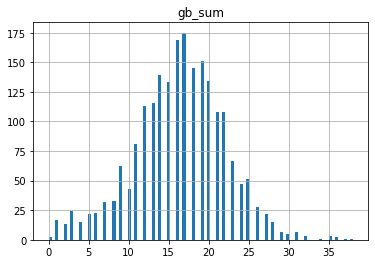

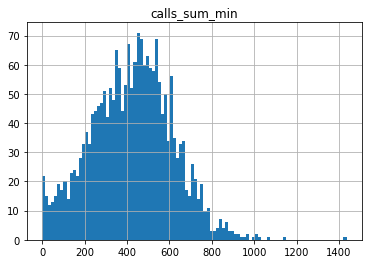

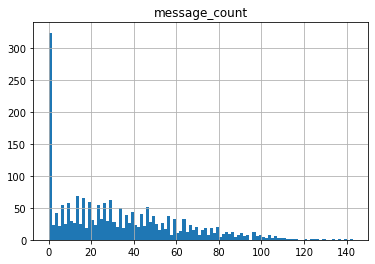

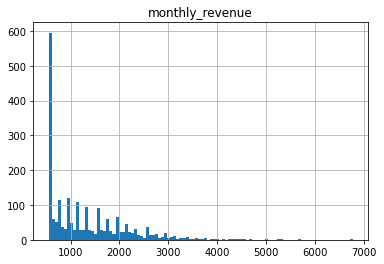

In [26]:
smart.hist('gb_sum', bins=100, range=(0, 38))
smart.hist('calls_sum_min', bins=100, range=(0, 1435))
smart.hist('message_count', bins=100, range=(0, 143))
smart.hist('monthly_revenue', bins=100, range=(550, 6770))

*Smart Data Plan Summary:*
<ol>
<li>In 76% of cases (1604 out of 2118) users exceed the limits of included minutes, messages and GB of Internet.</li>
<li>On average, Smart plan customers spend 423 minutes with a variance of 191 minutes, send 34 messages with a variance of 28 messages, spend 17 GB of Internet with a variance of 6 GB, and spend 1299 rubles with a variance of 822 rubles.</li>
<li>In about 28 cases, Smart tariff users did not send a single message for a whole month, in about 10 cases they did not use the Internet, and in about 12 cases they did not spend a minute of conversation at all. Megaline can consider introducing additional data plans for these types of users.</li>
<li>Distribution by number of minutes and distribution by number of GB are similar to normal distribution.</li>
<li>The distribution by total cost of services and by number of messages is similar to Pearson distribution.</li>
</ol>

# 6. Hypotheses Testing

# 6.1. Hypothesis 1

*Null Hypothesis:* The average revenue per user of Ultra and Smart Data Plans are equal<br>
*Alternative Hypothesis:* The average revenue per user of Ultra and Smart tariffs are different
    
The threshold value - alpha is 0.01 (99% accuracy)

In [27]:
alpha = 0.01

results = st.ttest_ind(ultra['monthly_revenue'], smart['monthly_revenue'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject null hypothesis') 

p-value: 4.21341783798234e-144
Rejecting the null hypothesis


In 99% of cases the average revenue per user of Ultra and Smart Data Plans are different.

# 6.2. Hypothesis 2

*Null Hypothesis:* The average revenue per user from Moscow does not differ from the revenue per user from other regions.<br>
*Alternative Hypothesis:* The average revenue per user from Moscow differs from the revenue per user from other regions.
    
The threshold value - alpha is 0.01 (99% accuracy)

In [28]:
moscow = data[data['city']==1]
not_moscow = data[data['city']==0]
  
alpha = 0.01

results = st.ttest_ind(moscow['monthly_revenue'], not_moscow['monthly_revenue'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject null hypothesis') 

p-value: 0.6177577589717255
Failed to reject null hypothesis


In 99% of cases the average revenue per user from Moscow is not different from the revenue per user from other regions.

# 7. Conclusion and Recommendations

*Ultra Data Plan Summary:*

In 86% of cases (785 out of 909) users do not go beyond the Ultra package, bringing Megaline 1950 rubles per month.
During the entire observation period, none of the clients of this tariff went beyond 224 messages and/or 1673 call minutes.
In about 170 cases Ultra tariff users did not send a single message for a whole month, in 10 cases they did not use the Internet, and in about 48 cases they did not spend call minutes at all. Megaline can consider introducing additional data plans for these types of users.
In average Ultra users spend 532 minutes with a variance of 320 minutes, send 51 messages with a variance of 48 messages, spend 20 GB of Internet with a variance of 10 GB and spend 2067 rubles with a variance of 369 rubles per month.
The distribution by number of minutes and the distribution by total cost of services are similar to normal distribution.

*Smart Data Plan Summary:*

In 76% of cases (1604 out of 2118) users exceed the limits of included minutes, messages and GB of Internet.
On average, Smart plan customers spend 423 minutes with a variance of 191 minutes, send 34 messages with a variance of 28 messages, spend 17 GB of Internet with a variance of 6 GB, and spend 1299 rubles with a variance of 822 rubles.
In about 28 cases, Smart tariff users did not send a single message for a whole month, in about 10 cases they did not use the Internet, and in about 12 cases they did not spend a minute of conversation at all. Megaline can consider introducing additional data plans for these types of users.
Distribution by number of minutes and distribution by number of GB are similar to normal distribution.
The distribution by total cost of services and by number of messages is similar to Pearson distribution.

In 99% of cases the average revenue per user of Ultra and Smart Data Plans are different.<br>
In 99% of cases the average revenue per user from Moscow is not different from the revenue per user from other regions.<br>

On average Ultra Data Plan brings Megaline 768 rubles per client more than Smart Data Plan. Ultra customers also spend an average of 109 minutes, 17 messages and 3 GB more every month.<br>

*Recommendations:*

If the company's goal is to maximize revenue from existing customers per month, I would recommend investing in the ads of Ultra. But I'm not sure that Smart tariff customers, who spend an average of 1299 rubles per month, are ready to pay 1950 rubles.<br>

If the company's goal is to attract and retain new customers (and maximize revenue in general for all customers) - I would introduce a new Data Plan that is cheaper than Ultra but more expensive than Smart and covers 95% or 99% of the needs of customers in minutes, messages and calls and would additionally check whether it is worth to introduce Data Plans for calls or Internet only.
